## Análise do preço dos combustíveis, em escala internacional e nacional
### Nesse projeto iremos analisar o comportamento dos preços dos combustíveis de forma externa e interna. Além disso, buscaremos entender alguns fatores e responder os seguintes questionamentos
#### 1. A cotação do dólar interfere no preço da gasolina?
#### 2. O preço da gasolina interfere no preço dos outros combustíveis?

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Lendo as bases de dados
Base_Dados = pd.read_excel('Base_Dados - Estudo Combustiveis.xlsx')
df_preco = pd.read_csv('Dados Preco Combutivel.csv')

In [7]:
Base_Dados.head()

,Ano,Mes,Data,Preco_Gasolina,Cotacao_Dolar,Acao_Petrobras,Preco_Baril,IPCA,Consumo_Energia(MWh)
0,2012,1,2012-01-31,2.775390,1.8701,25.400000,113.699997,6.22,36305167.29
1,2012,2,2012-02-29,2.769141,1.7448,25.600000,125.470001,5.85,36900531.02
2,2012,3,2012-03-31,2.770964,1.8234,25.299999,126.220001,5.24,38623110.72
3,2012,4,2012-04-30,2.769274,1.9058,23.230000,125.430000,5.10,37995869.09
4,2012,5,2012-05-31,2.766385,2.0873,21.400000,119.660004,4.99,36810191.03


In [8]:
df_preco.head()

,Data,Ano,Mes,Produto,Valor_Venda
0,2012-01-01,2012,1,DIESEL,2.027764
1,2012-01-01,2012,1,DIESEL S50,2.083545
2,2012-01-01,2012,1,ETANOL,1.873515
3,2012-01-01,2012,1,GASOLINA,2.646635
4,2012-01-01,2012,1,GNV,1.377651


In [22]:
count = 0
count1 = 0
for gas in list(df_preco['Produto']):
    if gas == 'DIESEL': 
        count += 1
    if gas == 'DIESEL S50':
        count1 += 1
print(count)
print(count1)

117
12


## EDA

In [29]:
Base_Dados.shape

(118, 9)

In [32]:
df_preco.shape

(600, 5)

In [33]:
df_preco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Data         600 non-null    object 
 1   Ano          600 non-null    int64  
 2   Mes          600 non-null    int64  
 3   Produto      600 non-null    object 
 4   Valor_Venda  600 non-null    float64
dtypes: float64(1), int64(2), object(2)
memory usage: 23.6+ KB


In [34]:
Base_Dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Ano                   118 non-null    int64         
 1   Mes                   118 non-null    int64         
 2   Data                  118 non-null    datetime64[ns]
 3   Preco_Gasolina        118 non-null    float64       
 4   Cotacao_Dolar         118 non-null    float64       
 5   Acao_Petrobras        118 non-null    float64       
 6   Preco_Baril           118 non-null    float64       
 7   IPCA                  118 non-null    float64       
 8   Consumo_Energia(MWh)  118 non-null    float64       
dtypes: datetime64[ns](1), float64(6), int64(2)
memory usage: 8.4 KB


### Checar dados nulos e NaN na base de dados

In [30]:
Base_Dados.isnull().sum()

Ano                     0
Mes                     0
Data                    0
Preco_Gasolina          0
Cotacao_Dolar           0
Acao_Petrobras          0
Preco_Baril             0
IPCA                    0
Consumo_Energia(MWh)    0
dtype: int64

In [31]:
Base_Dados.isna().sum()

Ano                     0
Mes                     0
Data                    0
Preco_Gasolina          0
Cotacao_Dolar           0
Acao_Petrobras          0
Preco_Baril             0
IPCA                    0
Consumo_Energia(MWh)    0
dtype: int64

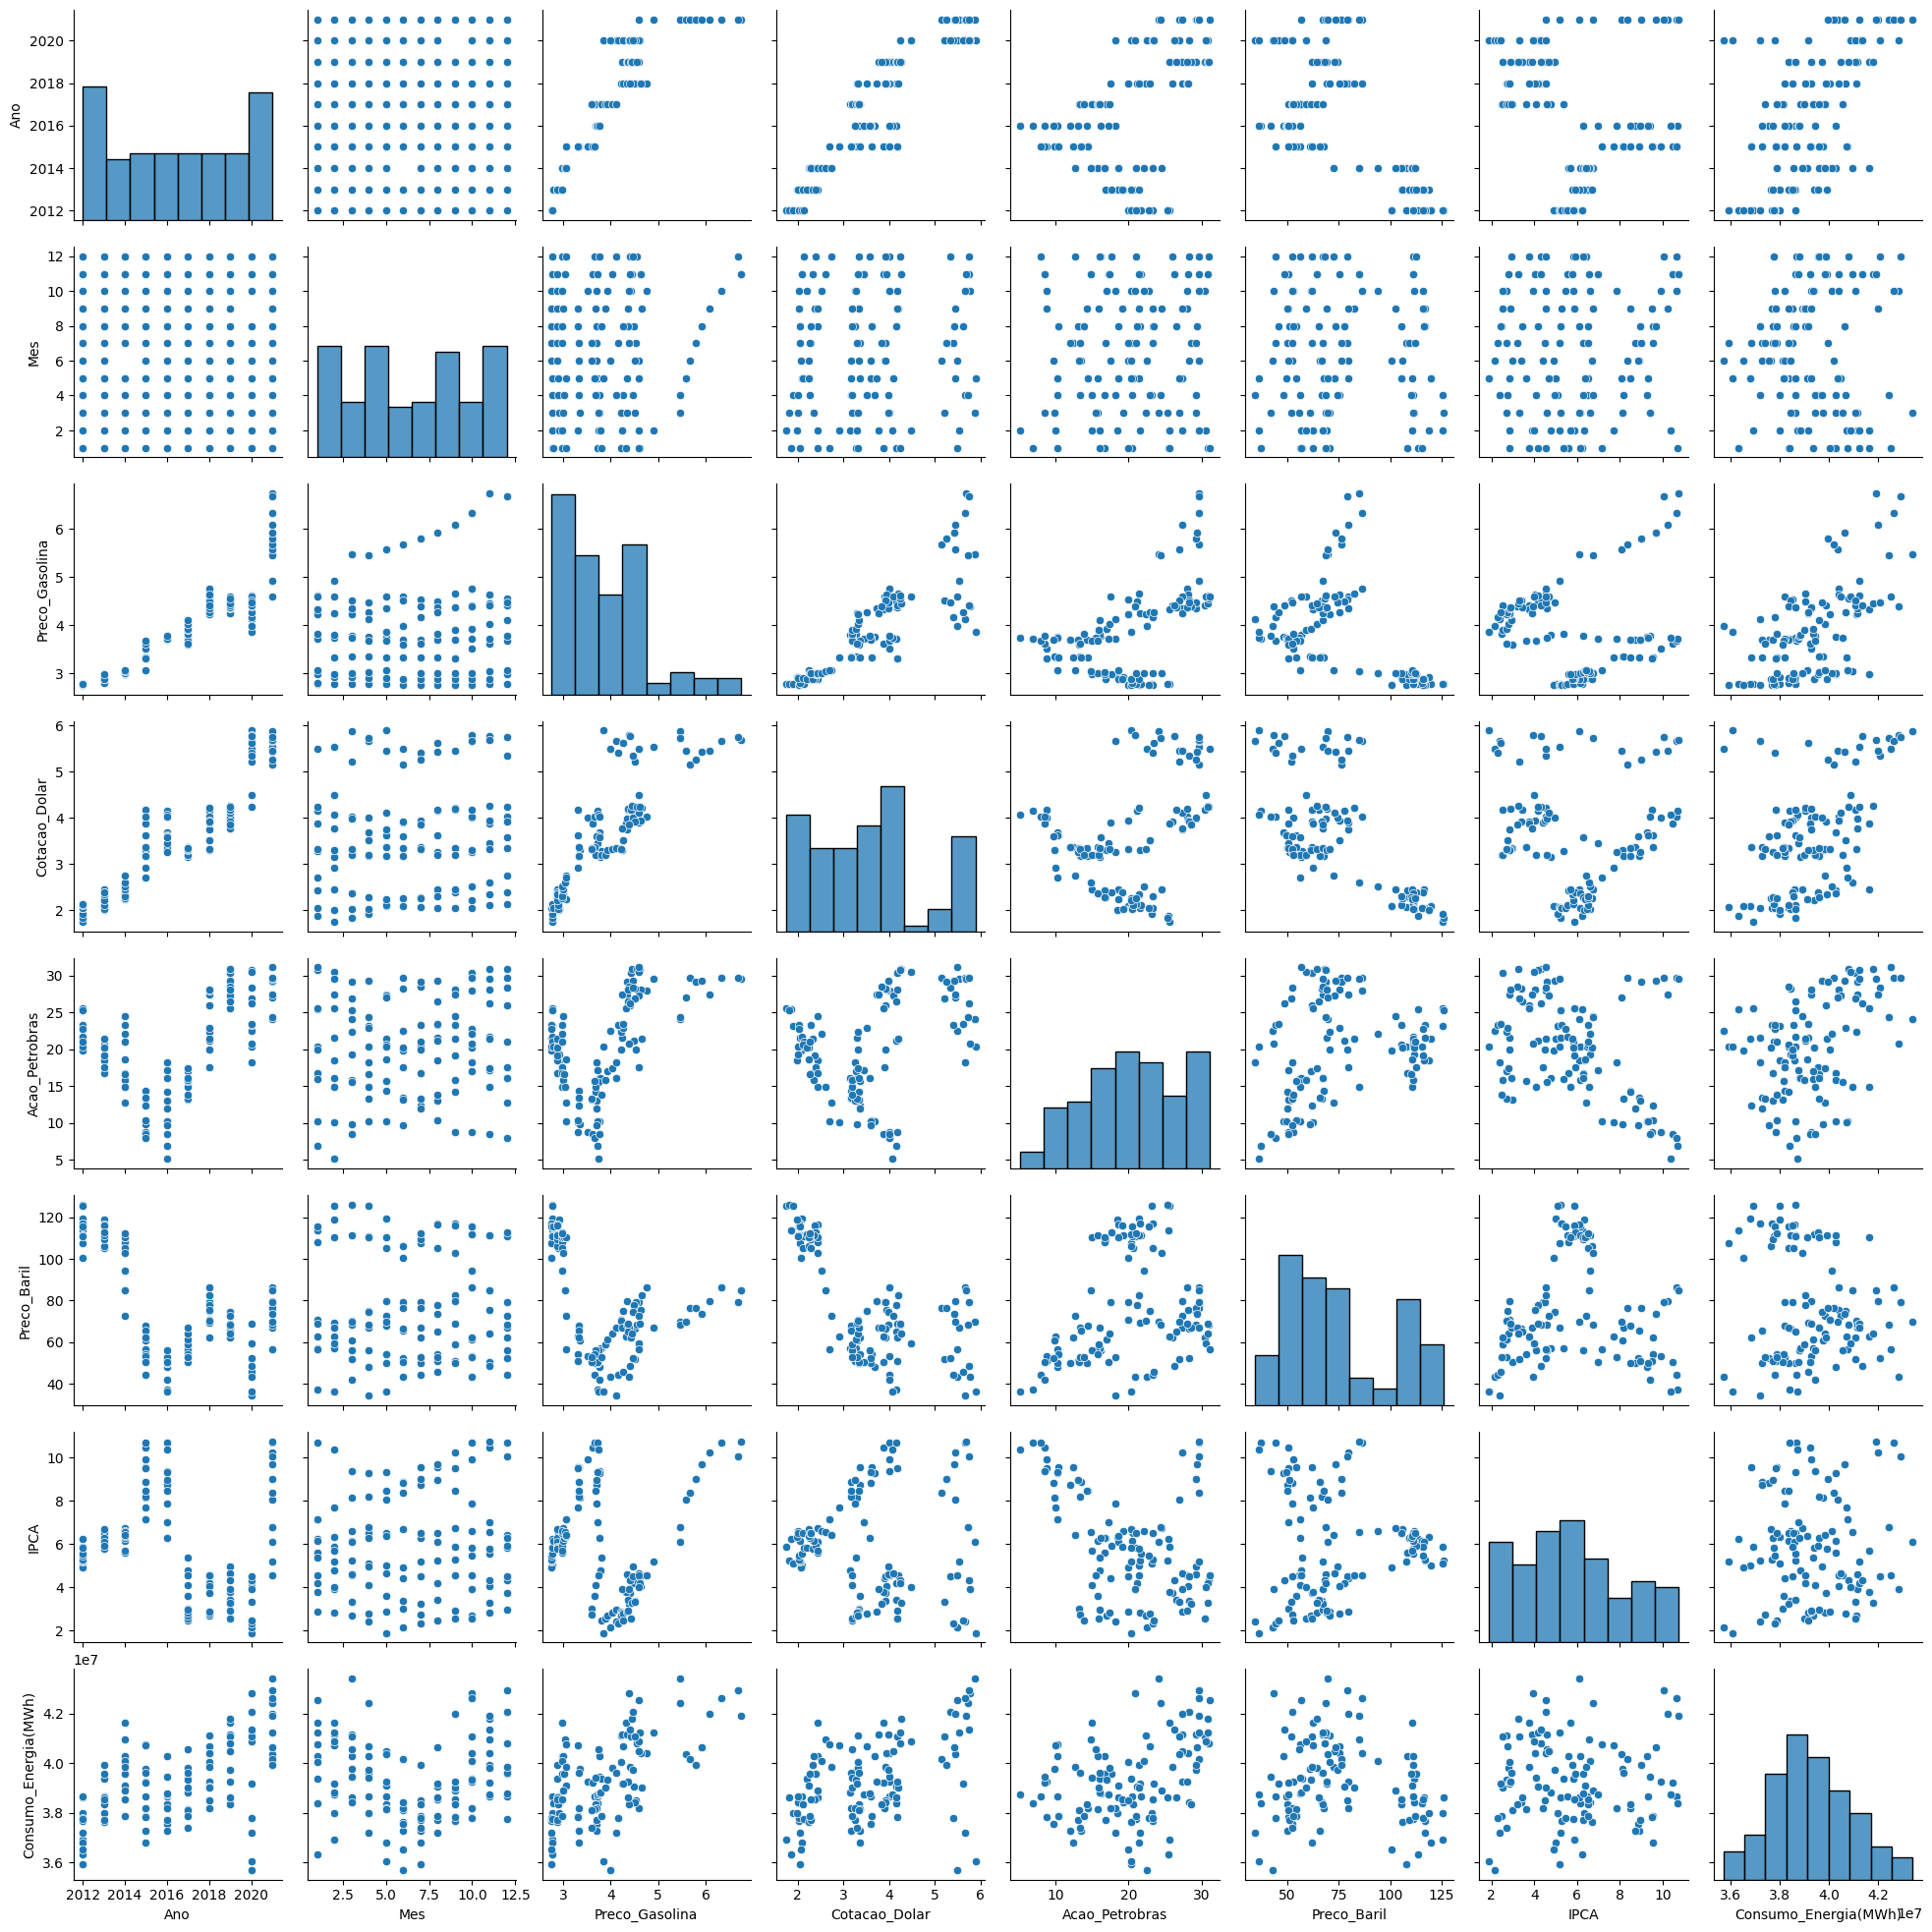

In [3]:
sns.pairplot(Base_Dados)

### Analisando o comportamento do preço da gasolina em função do dólar

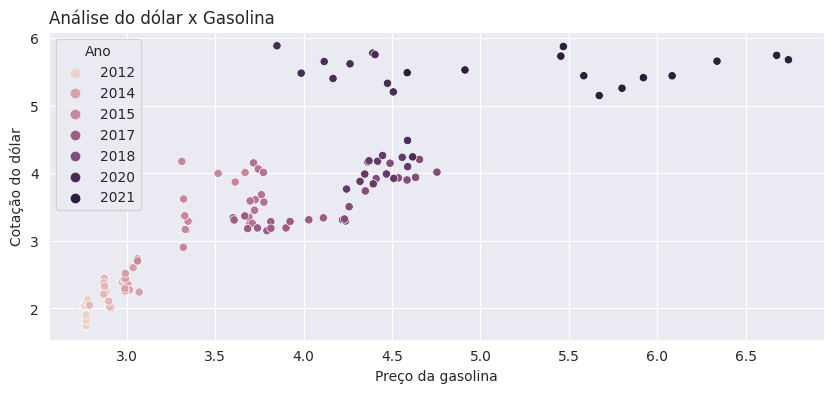

In [60]:
plt.figure( figsize=(10, 4) )

with sns.axes_style("darkgrid"):
    sns.scatterplot(x=Base_Dados['Preco_Gasolina'], y=Base_Dados['Cotacao_Dolar'], hue= Base_Dados['Ano']);

plt.title('Análise do dólar x Gasolina', loc='left')
plt.ylabel('Cotação do dólar')
plt.xlabel('Preço da gasolina');

In [2]:
plt.figure( figsize=(10, 10) )
plt.subplots_adjust(hspace=0.5)

plt.subplot(2,1,1)
plt.plot(Base_Dados['Data'], Base_Dados['Acao_Petrobras'], linewidth = 3, color='green');

plt.title('Análise temporal da cotação da petrobrás', loc='left')
plt.ylabel('Ação da petrobrás')
plt.xlabel('Tempo');

with sns.axes_style("darkgrid"):
    plt.subplot(2,1,2)
    sns.scatterplot(x=Base_Dados['Preco_Gasolina'], y= Base_Dados['Acao_Petrobras'], hue=Base_Dados['Ano']);

plt.title('Análise da cotação da pretrobrás x Gasolina', loc='left')
plt.ylabel('Cotação Petrobrás')
plt.xlabel('Preço da gasolina');

NameError: name 'plt' is not defined

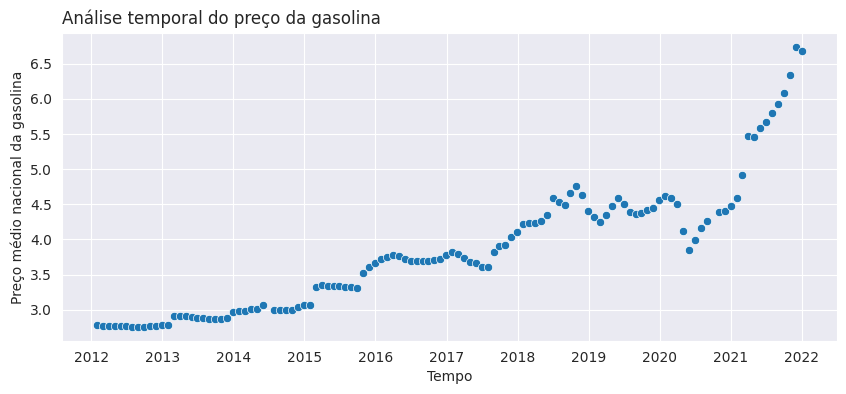

In [89]:
plt.figure( figsize=(10, 4) )

with sns.axes_style("darkgrid"):
    sns.scatterplot(x=Base_Dados['Data'], y=Base_Dados['Preco_Gasolina']);

plt.title('Análise temporal do preço da gasolina', loc='left')
plt.ylabel('Preço médio nacional da gasolina')
plt.xlabel('Tempo');

### Podemos analisar como o preço do barril de petróleo, cujo preço é definido em dólar, define o preço da nossa gasolina.

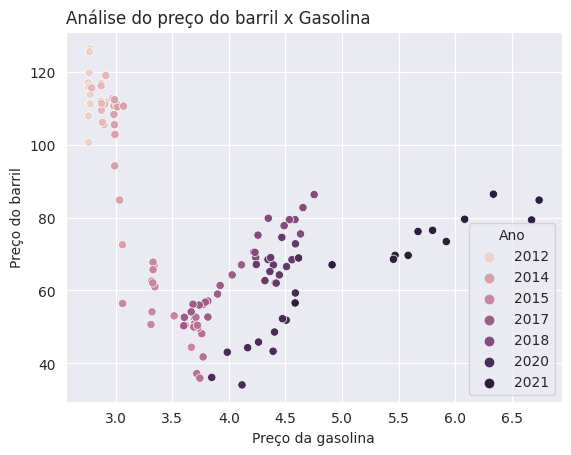

In [91]:
with sns.axes_style("darkgrid"):
    sns.scatterplot(x=Base_Dados['Preco_Gasolina'], y= Base_Dados['Preco_Baril'], hue=Base_Dados['Ano']);

plt.title('Análise do preço do barril x Gasolina', loc='left')
plt.ylabel('Preço do barril')
plt.xlabel('Preço da gasolina');

Text(0.5, 1.0, 'Análise temporal do preço do barril')

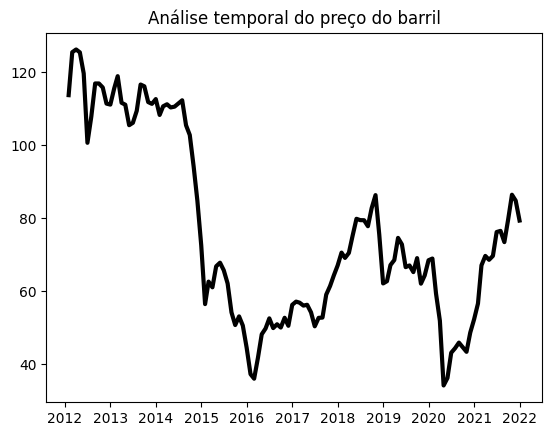

In [101]:
plt.plot(Base_Dados['Data'], Base_Dados['Preco_Baril'], linewidth = 3, color='black')
plt.title("Análise temporal do preço do barril")

Text(0.0, 1.0, 'Análise temporal do preço da gasolina')

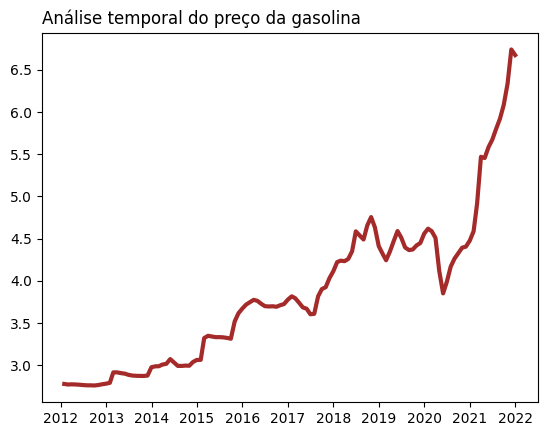

In [100]:
plt.plot(Base_Dados['Data'], Base_Dados['Preco_Gasolina'], linewidth = 3, color='brown')

plt.title("Análise temporal do preço da gasolina", loc='left')

### A princípio não parece haver nenhuma correlação forte entre os dois ativos, no entanto, devemos lembrar que o barril de petróleo é uma commoditie e está pareada com o preço do dólar. E olhando o segundo gráfico acima, seria esperado que em 2016 e 2020, quando o preço do barril foi um mínimo local, o preço da gasolina também o fosse, no entanto, ao mesmo tempo que isso aconteceu, uma alta no dólar também ocorreu. Desse modo, o preço da gasolina não teve sua esperada baixa.

## Ao analisar dessa forma e buscar entender o que está atrelada ao preço da gasolina, irei plotar uma matriz de correlação e buscar entender o que o coeficiente de pearson nos fala acerca do assunto.

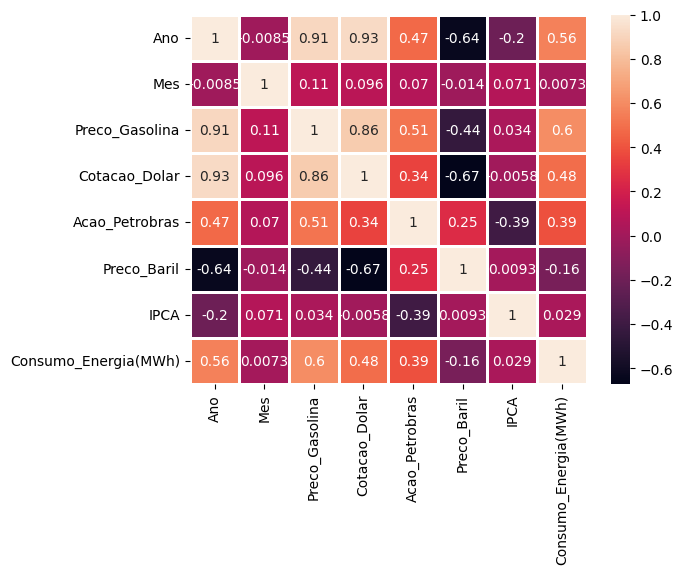

In [105]:
corr = Base_Dados.corr()

sns.heatmap(corr, annot= True, linewidths=2);

# Relatório geral

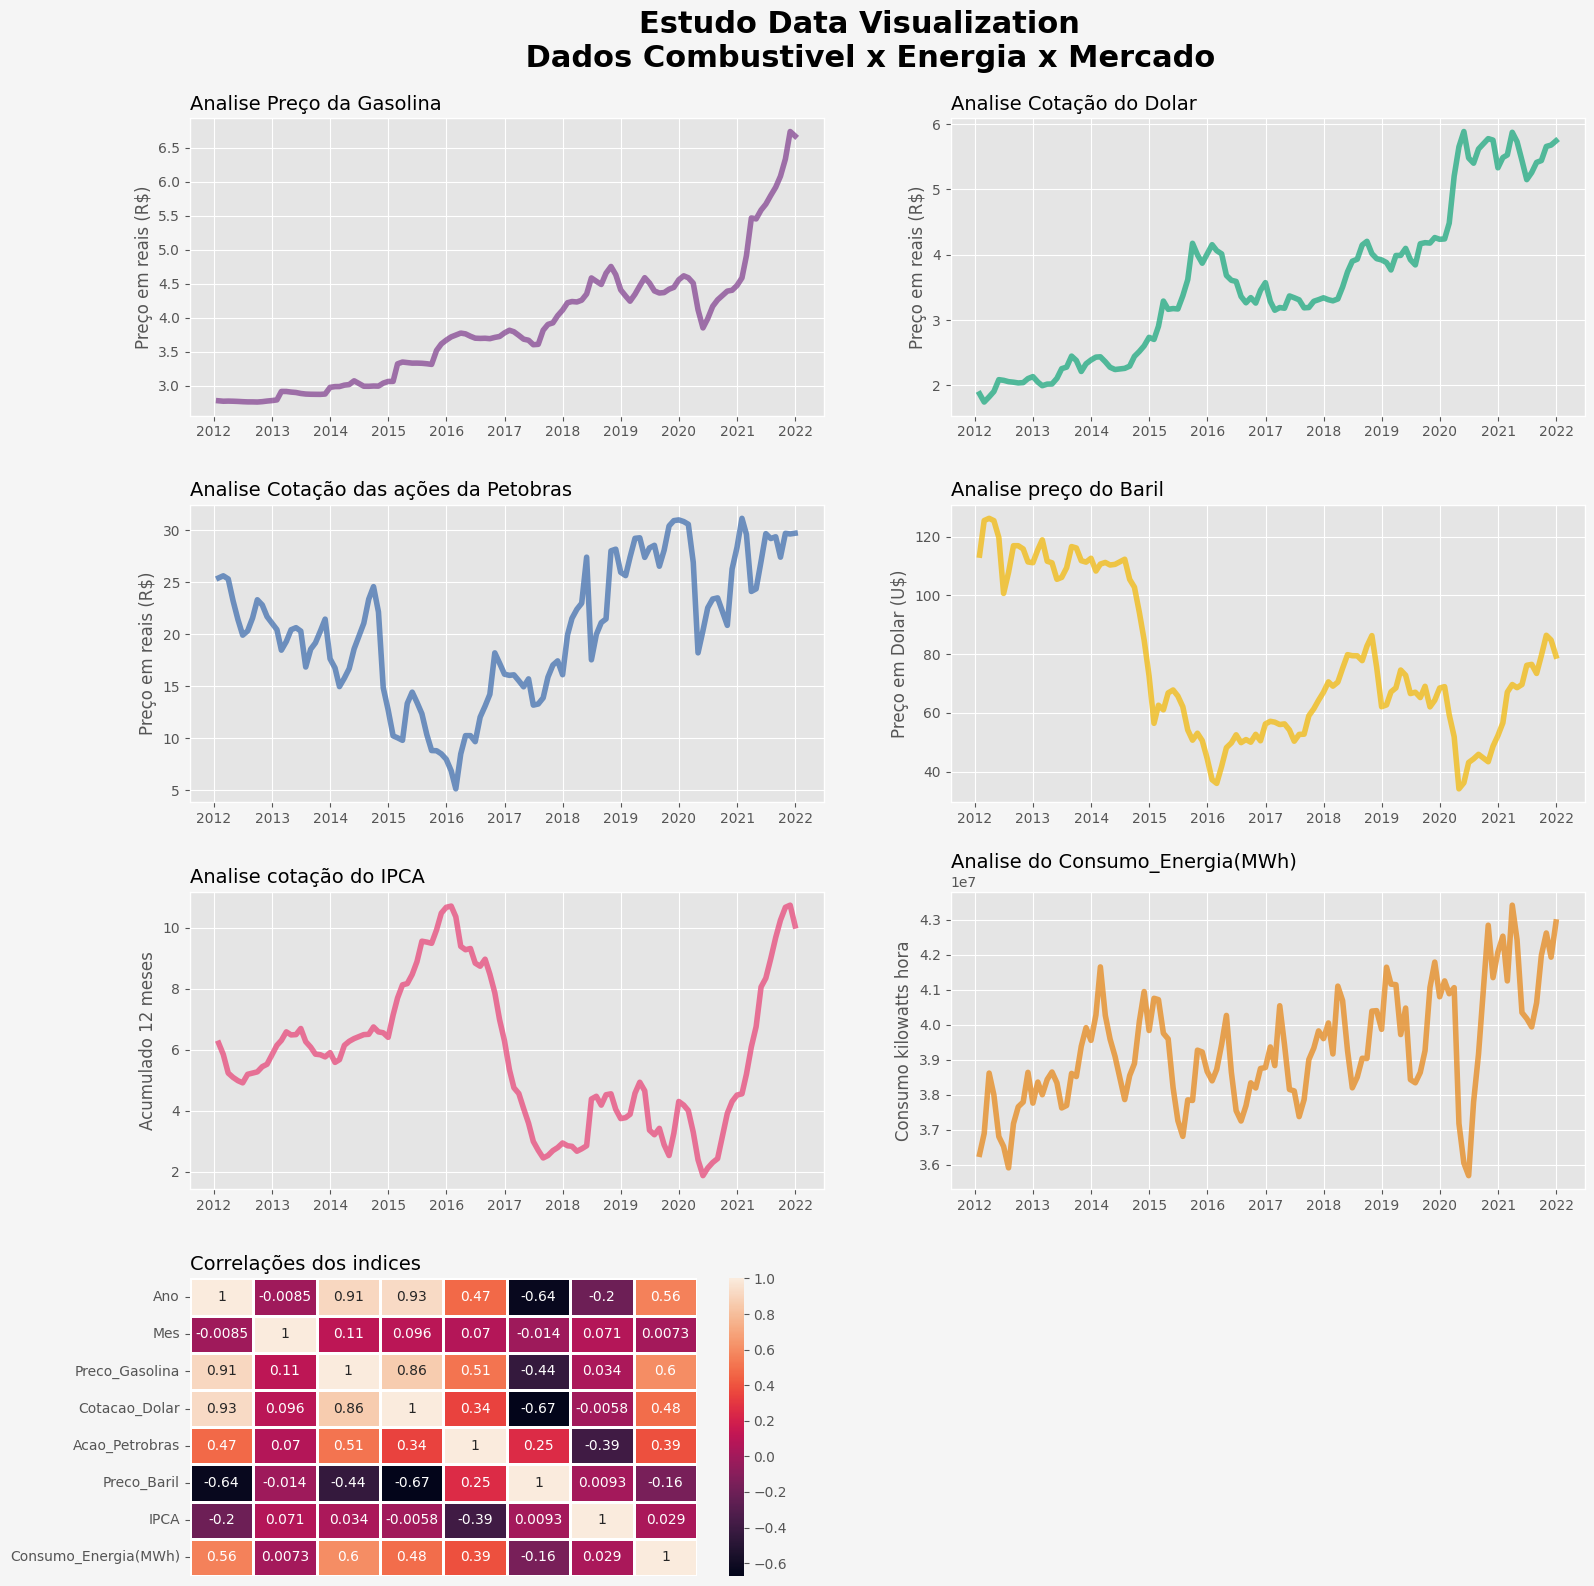

In [108]:
# Tamanho da Imagem
Figura, Eixo = plt.subplots( figsize=( 18, 18 ) )

# Cor Fundo
Cor_Fundo = '#f5f5f5'
Figura.set_facecolor(Cor_Fundo)
Eixo.set_facecolor(Cor_Fundo)

# Estilo
plt.style.use('ggplot')

# Paleta de Cores
Paleta = [ "#7F3C8D", "#11A579", "#3969AC", "#F2B701", "#E73F74", "#80BA5A", "#E68310" ]

# Titulo
plt.suptitle('Estudo Data Visualization \n Dados Combustivel x Energia x Mercado', fontsize=22, fontweight='bold' )

# Parametros do relatorio
Colunas = 2
Linha = 4

plt.subplot( Linha, Colunas, 1 )
plt.title('Analise Preço da Gasolina', loc='left', fontsize=14, fontweight=0 )
plt.plot( Base_Dados['Data'], Base_Dados['Preco_Gasolina'], linewidth=4, color=Paleta[0], alpha=0.7 )
plt.ylabel('Preço em reais (R$)')

plt.subplot( Linha, Colunas, 2 )
plt.title('Analise Cotação do Dolar', loc='left', fontsize=14, fontweight=0 )
plt.plot( Base_Dados['Data'], Base_Dados['Cotacao_Dolar'], linewidth=4, color=Paleta[1], alpha=0.7 )
plt.ylabel('Preço em reais (R$)')

plt.subplot( Linha, Colunas, 3 )
plt.title('Analise Cotação das ações da Petobras', loc='left', fontsize=14, fontweight=0 )
plt.plot( Base_Dados['Data'], Base_Dados['Acao_Petrobras'], linewidth=4, color=Paleta[2], alpha=0.7 )
plt.ylabel('Preço em reais (R$)')

plt.subplot( Linha, Colunas, 4 )
plt.title('Analise preço do Baril', loc='left', fontsize=14, fontweight=0 )
plt.plot( Base_Dados['Data'], Base_Dados['Preco_Baril'], linewidth=4, color=Paleta[3], alpha=0.7 )
plt.ylabel('Preço em Dolar (U$)')

plt.subplot( Linha, Colunas, 5 )
plt.title('Analise cotação do IPCA', loc='left', fontsize=14, fontweight=0 )
plt.plot( Base_Dados['Data'], Base_Dados['IPCA'], linewidth=4, color=Paleta[4], alpha=0.7 )
plt.ylabel('Acumulado 12 meses')

plt.subplot( Linha, Colunas, 6 )
plt.title('Analise do Consumo_Energia(MWh)', loc='left', fontsize=14, fontweight=0)
plt.plot( Base_Dados['Data'], Base_Dados['Consumo_Energia(MWh)'], linewidth=4, color=Paleta[6], alpha=0.7 )
plt.ylabel('Consumo kilowatts hora')

plt.subplot( Linha, Colunas, 7 )
plt.title('Correlações dos indices', loc='left', fontsize=14, fontweight=0 )
sns.heatmap( corr, annot=True, linewidths=2, linecolor='#fff', xticklabels=False );

plt.subplots_adjust( hspace=0.30, top=0.92 );